# Kmeans and KNNs example
## Kmeans

Let's produce a sample on which we can use our Kmeans algorithm, make_blobs produce an arbitrary dataset whereby the points are gather around centers.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

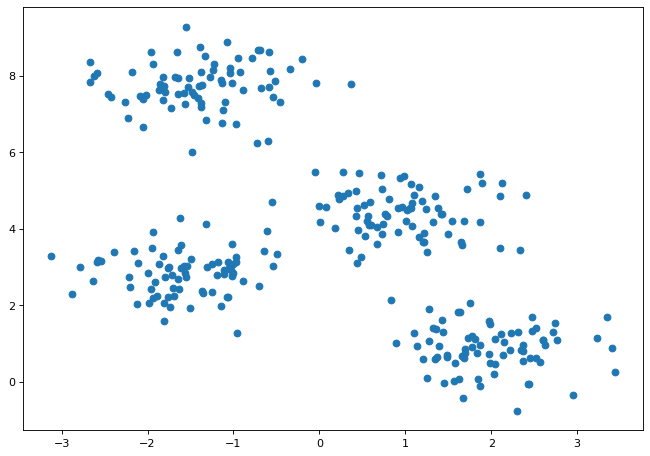

In [3]:
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(X[:,0], X[:,1])

In [4]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

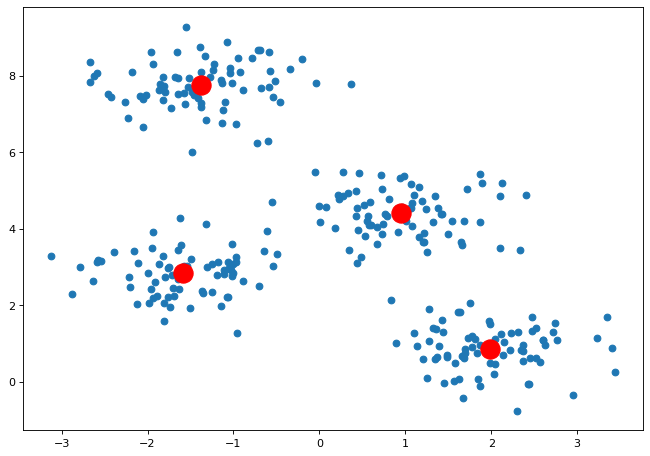

In [5]:
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## KNNs

Let's produce a sample on which we can use our Knn algorithm

In [6]:
X, y = make_blobs(n_samples=2000, centers=3, n_features=5, cluster_std=5, random_state=101)

In [7]:
df = pd.DataFrame(X, columns=['feature_' + str(i) for i in range(1, 6)])

In [8]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,4.227026,-2.250110,-7.222115,2.551838,8.851844
1,0.079262,-5.202500,-9.156317,4.611931,11.592343
2,5.963345,-5.141261,16.587770,5.248219,-8.222444
3,1.322119,-3.182498,0.540114,-12.408960,8.898312
4,0.985113,-1.668149,-2.715824,-1.371923,8.037914


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, metric = "minkowski", p = 1)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [12]:
predictions = knn.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[208   3  29]
 [  5 207   3]
 [ 38   6 201]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       240
           1       0.96      0.96      0.96       215
           2       0.86      0.82      0.84       245

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700



In [14]:
knn_improved = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 1)

In [15]:
knn_improved.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [16]:
predictions_improved = knn_improved.predict(X_test)

In [17]:
print(confusion_matrix(y_test, predictions_improved))
print(classification_report(y_test, predictions_improved))

[[222   1  17]
 [  2 211   2]
 [ 30   3 212]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       240
           1       0.98      0.98      0.98       215
           2       0.92      0.87      0.89       245

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700

